In [82]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = pd.read_json("~/two-sigma/data/processed_train.json")

In [101]:
train_data = train_data.fillna(0)


In [102]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(d1, d2)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [103]:
d3 = {'Feature': ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility","avg_brightness","avg_imagesize","avg_luminance","img_quantity","description_sentiment","dist_count","manager count","unique_count","word_count"],
        'Importance': list(model.feature_importances_)
        }



In [104]:
d4 = pd.DataFrame(d3,index = ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility","avg_brightness","avg_imagesize","avg_luminance","img_quantity","description_sentiment","dist_count","manager count","unique_count","word_count"])

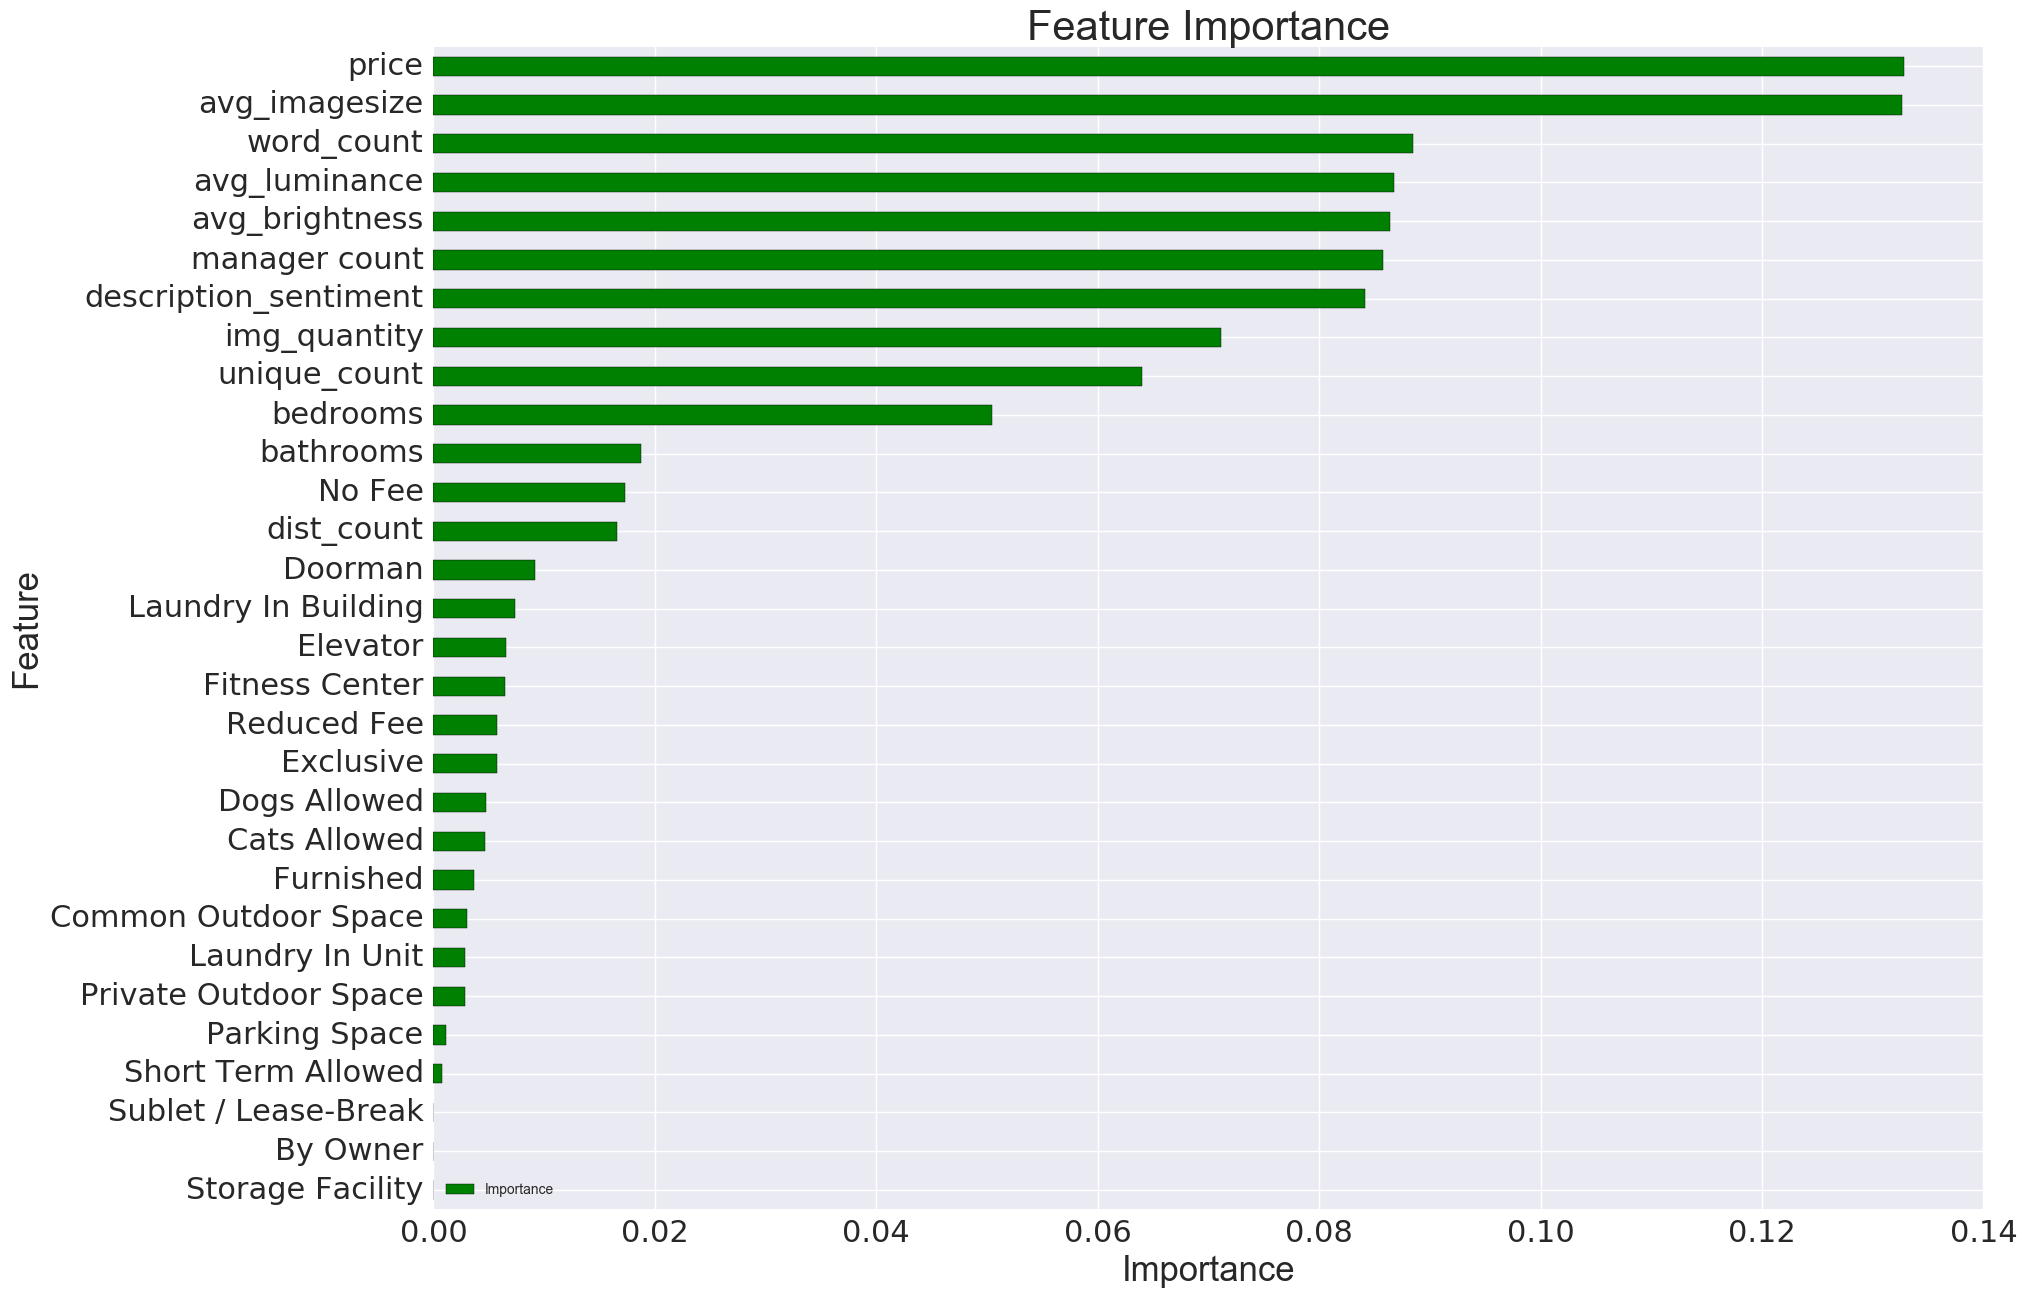

In [105]:
import seaborn as sn
import matplotlib.pyplot as plt
d4.sort_values("Importance", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.title('Feature Importance',fontsize= 30)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('Feature', fontsize=25)
plt.show()

In [69]:
#We do see the photos have significant impact on the interest levels